## Crime and Population Data Analysis

In [1]:
import pandas as pd

path = 'crime.csv'
df = pd.read_csv(path)

arrests_by_neighborhood = df.groupby('INCIDENTNEIGHBORHOOD').count()[df.columns[0]].reset_index()
arrests_by_neighborhood.columns = ['INCIDENTNEIGHBORHOOD', 'Number of Arrests']

sorted_arrests = arrests_by_neighborhood.sort_values(by='Number of Arrests', ascending=False)

pd.set_option('display.max_rows', None)

print(sorted_arrests.to_string (index=False))

       INCIDENTNEIGHBORHOOD  Number of Arrests
  Central Business District               4439
           South Side Flats               3496
                    Carrick               2351
             East Allegheny               2217
             Homewood South               2090
             Homewood North               1968
               East Liberty               1889
         Marshall-Shadeland               1516
                      Bluff               1502
           Mount Washington               1434
                  Hazelwood               1396
                  Brookline               1389
   Lincoln-Lemington-Belmar               1362
                  Knoxville               1336
                   Sheraden               1285
           Allegheny Center               1244
                  Beechview               1201
                 East Hills               1194
           Brighton Heights               1114
                Perry South               1057
             

Here is every neighborhood in Pittsburgh ranked based on the number of arrests. This list might be a little too long but it is nice seeing individual values. Below we have is data in the form of a bar graph.

Text(0, 0.5, 'Number of Arrests')

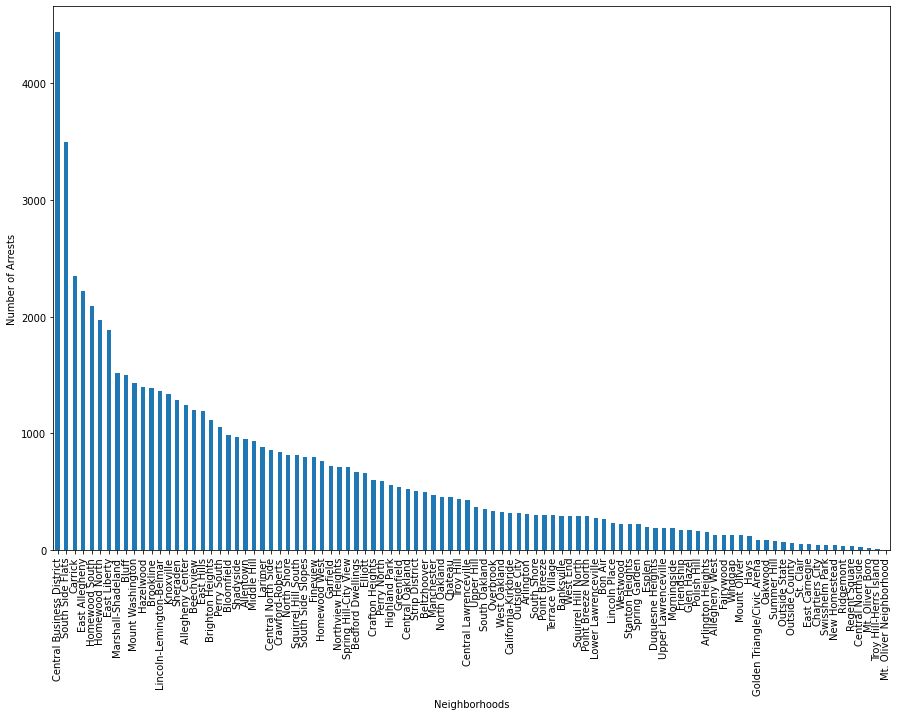

In [14]:
import pandas as pd

path = 'crime.csv'
df = pd.read_csv(path)

arrests_by_neighborhood = df.groupby('INCIDENTNEIGHBORHOOD').size().reset_index()
arrests_by_neighborhood.columns = ['INCIDENTNEIGHBORHOOD', 'Number of Arrests']

sorted_arrests = arrests_by_neighborhood.sort_values(by='Number of Arrests', ascending=False)

chart = sorted_arrests.plot.bar(x='INCIDENTNEIGHBORHOOD', y='Number of Arrests', legend=None, figsize= (15,10))

chart.set_xlabel('Neighborhoods')
chart.set_ylabel('Number of Arrests')

In [2]:
import pandas as pd

path = 'crime.csv'
df = pd.read_csv(path)

last_index_value = df.index[-1]

print("We are looking at:", last_index_value ,"arrests across Pittsburgh. This dataset ended 11/14/2023")

We are looking at: 66470 arrests across Pittsburgh. This dataset ended 11/14/2023


In [7]:
import pandas as pd

path = 'crime.csv'
df = pd.read_csv(path)

time = df.sort_values(by='ARRESTTIME')

print(time.loc[time.index[0], 'ARRESTTIME'])

print(time.loc[time.index[-1], 'ARRESTTIME'])

1998-03-11T11:30:00
2023-11-14T03:00:00


In [1]:
import pandas as pd

path = 'crime.csv'
df = pd.read_csv(path)

offensesperneighborhood = df.groupby(['INCIDENTNEIGHBORHOOD', 'OFFENSES']).size().reset_index()

offensesperneighborhood.columns = ['INCIDENTNEIGHBORHOOD', 'OFFENSES', 'Count']



sort = offensesperneighborhood.sort_values(by=['INCIDENTNEIGHBORHOOD', 'Count'], ascending=[True, False])

neighborhoods = sort['INCIDENTNEIGHBORHOOD'].unique()
for neighborhood in neighborhoods:
    print(f"\n{neighborhood}:")
    top3offenses = sort[sort['INCIDENTNEIGHBORHOOD'] == neighborhood].head(3)
    for index, row in top3offenses.iterrows():
        print(f"{row['OFFENSES']}: {row['Count']} occurrences")



Allegheny Center:
9015 Failure To Appear/Arrest on Attachment Order: 114 occurrences
13(a)(32) Paraphernalia - Use or Possession: 108 occurrences
9501 Bench Warrant: 92 occurrences

Allegheny West:
9501 Bench Warrant: 9 occurrences
2701 Simple Assault.: 6 occurrences
9015 Failure To Appear/Arrest on Attachment Order: 6 occurrences

Allentown:
2701 Simple Assault.: 94 occurrences
9501 Bench Warrant: 65 occurrences
9015 Failure To Appear/Arrest on Attachment Order: 52 occurrences

Arlington:
2701 Simple Assault.: 47 occurrences
9015 Failure To Appear/Arrest on Attachment Order: 16 occurrences
9501 Bench Warrant: 13 occurrences

Arlington Heights:
2701 Simple Assault.: 18 occurrences
901 Criminal Attempt / 903 Criminal Conspiracy. / 2702 Aggravated Assault.: 10 occurrences
2701 Simple Assault. / 2718(a)(1) Strangulation - Applying Pressure to the Throat or Neck: 7 occurrences

Banksville:
2701 Simple Assault.: 30 occurrences
9015 Failure To Appear/Arrest on Attachment Order: 14 occurrenc

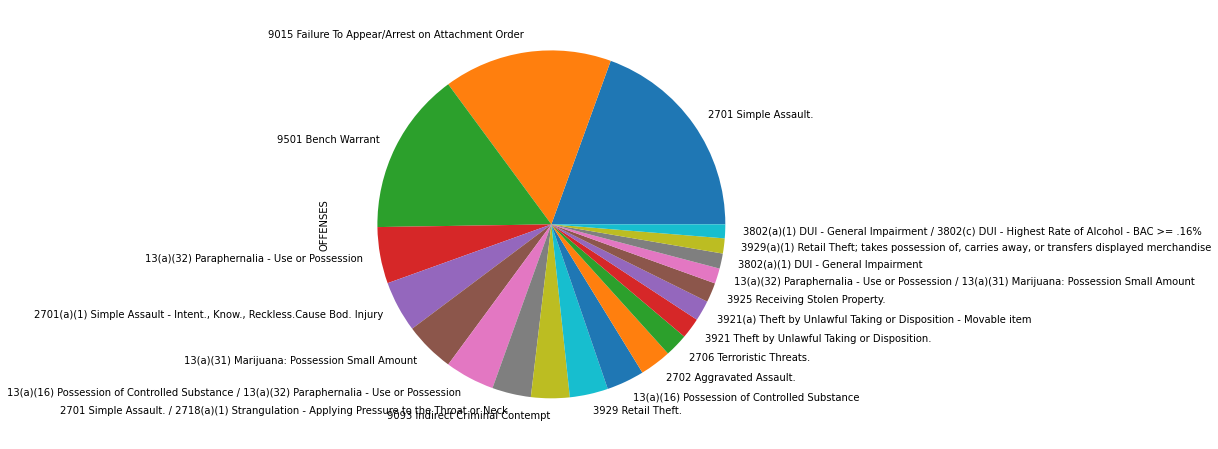

In [15]:
import pandas as pd

path = 'crime.csv'
df = pd.read_csv(path)

topoffenses = df["OFFENSES"].value_counts().nlargest(20)


topoffenses.plot.pie(figsize=(8, 8))



Text(0, 0.5, 'Population Size')

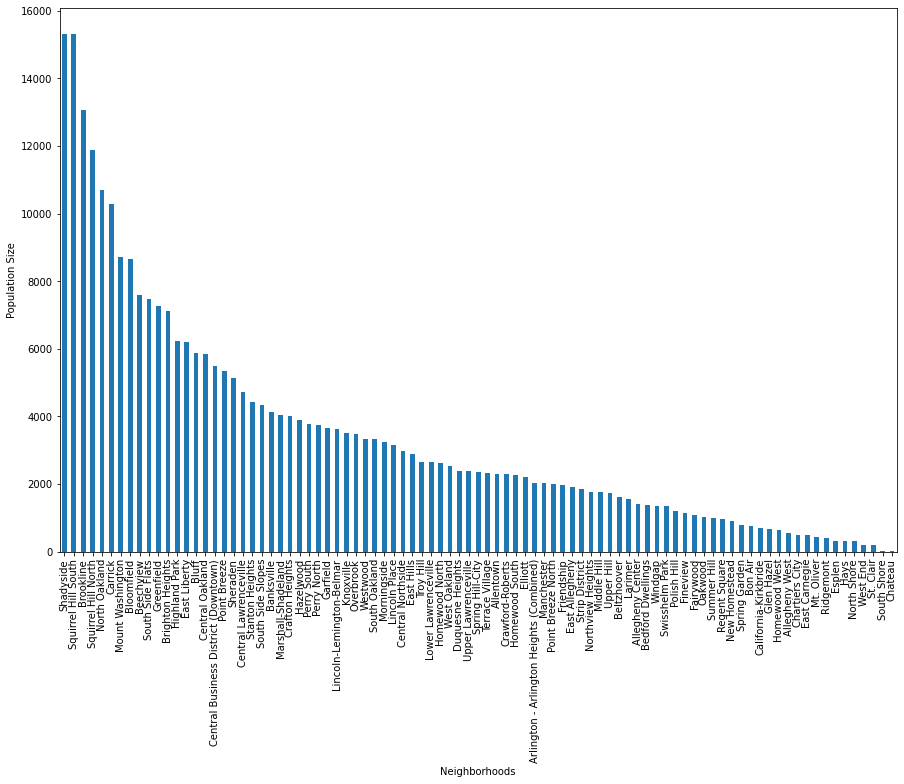

In [11]:
import pandas as pd

path = 'population.csv'
pop = pd.read_csv(path)

sortedpopulation = pop.sort_values(by='2020_Total_Population', ascending=False)

chart = sortedpopulation.plot.bar(x='Neighborhood', y='2020_Total_Population', legend=None, figsize= (15,10))

chart.set_xlabel('Neighborhoods')
chart.set_ylabel('Population Size')




In [3]:
import pandas as pd

path = 'population.csv'
pop = pd.read_csv(path)

pop_2010 = pop['2010_Total_Population'].sum()
pop_2020= pop['2020_Total_Population'].sum()


print("Pittsburgh's population in 2010 was" ,pop_2010,". In 2020, Pittsburgh's population was", pop_2020, ". This reveals that Pittsburgh's population has decreased by", pop_2020-pop_2010, "over ten years.")


Pittsburgh's population in 2010 was 305704 . In 2020, Pittsburgh's population was 302971 . This reveals that Pittsburgh's population has decreased by -2733 over ten years.


In [1]:
import pandas as pd

crime = 'crime.csv'
pop = 'population.csv'

crimedf= pd.read_csv(crime)
popdf = pd.read_csv(pop)

crimesin2020 = crimedf[crimedf['ARRESTTIME'].str.contains('2020', na=False)]
popin2020 = popdf.groupby('Neighborhood')['2020_Total_Population'].sum().reset_index()

merged = pd.merge(crimesin2020, popin2020, left_on='INCIDENTNEIGHBORHOOD', right_on='Neighborhood', how='inner')
crimesperneighborhood = merged.groupby('INCIDENTNEIGHBORHOOD').agg({merged.columns[0]: 'count', '2020_Total_Population': 'first'})
crimesperneighborhood = crimesperneighborhood.rename(columns={merged.columns[0]: '2020 Total Crimes', '2020_Total_Population': '2020 Total Population'})

crimesperneighborhood['Crime Rate'] = crimesperneighborhood['2020 Total Crimes'] / crimesperneighborhood['2020 Total Population']

sortedbyrate= crimesperneighborhood.sort_values(by='Crime Rate', ascending = False)

print(sortedbyrate)



                      2020 Total Crimes  2020 Total Population  Crime Rate
INCIDENTNEIGHBORHOOD                                                      
Chateau                              37                     19    1.947368
South Shore                          37                     29    1.275862
North Shore                          58                    301    0.192691
Homewood West                       107                    642    0.166667
West End                             31                    205    0.151220
...                                 ...                    ...         ...
Swisshelm Park                        7                   1339    0.005228
North Oakland                        55                  10691    0.005145
New Homestead                         3                    917    0.003272
Regent Square                         3                    971    0.003090
Squirrel Hill North                  31                  11879    0.002610

[84 rows x 3 columns]


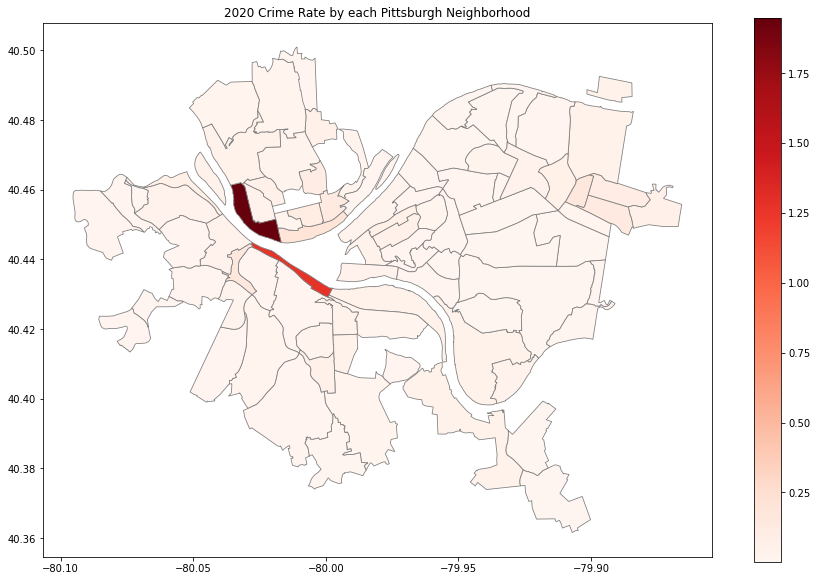

In [76]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plot

neighborhoods=gpd.read_file('Data-Visualization/Neighborhoods/Neighborhoods_.shp')
crime = 'crime.csv'
pop = 'population.csv'


crimedf= pd.read_csv(crime)
popdf = pd.read_csv(pop)

crimesin2020 = crimedf[crimedf['ARRESTTIME'].str.contains('2020', na=False)]
popin2020 = popdf.groupby('Neighborhood')['2020_Total_Population'].sum().reset_index()

merged = pd.merge(crimesin2020, popin2020, left_on='INCIDENTNEIGHBORHOOD', right_on='Neighborhood', how='left')

crimesperneighborhood = merged.groupby('INCIDENTNEIGHBORHOOD').agg({merged.columns[0]: 'count', '2020_Total_Population': 'first'})
crimesperneighborhood = crimesperneighborhood.rename(columns={merged.columns[0]: '2020 Total Crimes', '2020_Total_Population': '2020 Total Population'})
crimesperneighborhood['Crime Rate'] = crimesperneighborhood['2020 Total Crimes'] / crimesperneighborhood['2020 Total Population']
crimesperneighborhood['Crime Rate'] = crimesperneighborhood['2020 Total Crimes'] / crimesperneighborhood['2020 Total Population']
neighborhoodcrime = neighborhoods.merge(crimesperneighborhood, left_on='hood', right_index=True, how='left')

fig, ax = plot.subplots(1, 1, figsize=(15, 10))
neighborhoodcrime.plot(column='Crime Rate', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.5', legend=True)
ax.set_title('2020 Crime Rate by each Pittsburgh Neighborhood')
plot.show()


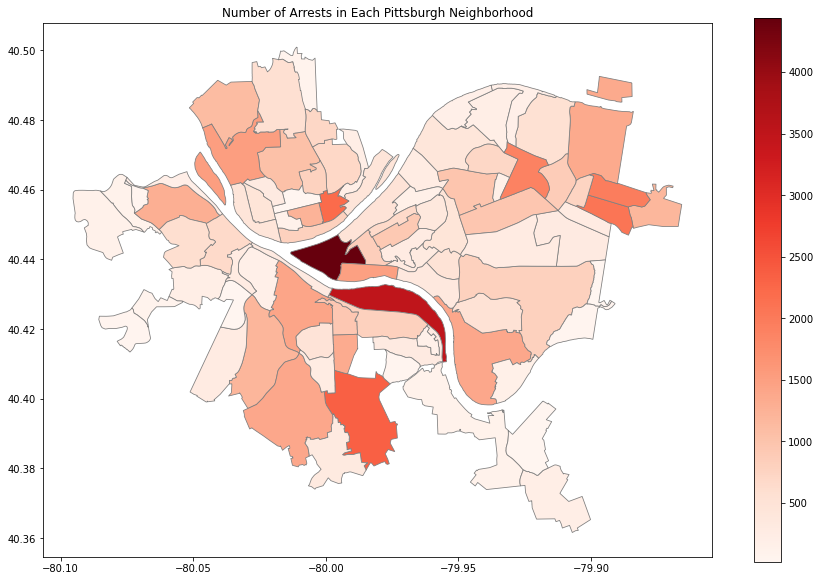

In [75]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plot

path = 'crime.csv'
df = pd.read_csv(path)
neighborhoods=gpd.read_file('Data-Visualization/Neighborhoods/Neighborhoods_.shp')

arrests_by_neighborhood = df.groupby('INCIDENTNEIGHBORHOOD').size().reset_index()
arrests_by_neighborhood.columns = ['INCIDENTNEIGHBORHOOD', 'Number of Arrests']

mergedarrests = neighborhoods.merge(arrests_by_neighborhood, left_on='hood', right_on='INCIDENTNEIGHBORHOOD', how='left')


fig, ax = plot.subplots(1, 1, figsize=(15, 10))
mergedarrests.plot(column='Number of Arrests', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.5', legend=True)
ax.set_title('Number of Arrests in Each Pittsburgh Neighborhood')
plot.show()


As we can see from this map, South Side and the Central Business District have the highest number of arrests; however, when compared to crime rates, areas with a lower number of arrests have higher crime rate. This is because everything is relative to the population of each neighborhood.

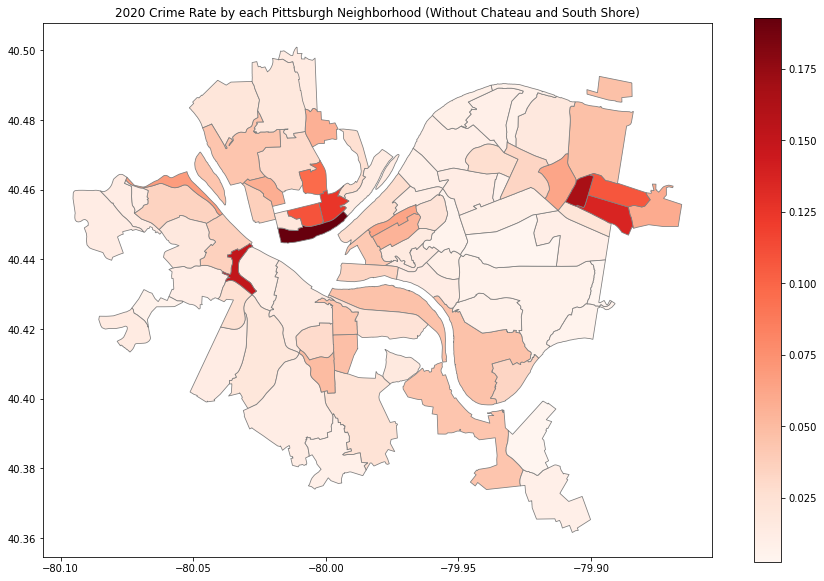

In [4]:

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plot

neighborhoods=gpd.read_file('Data-Visualization/Neighborhoods/Neighborhoods_.shp')
crime = 'crime.csv'
pop = 'population.csv'

crimedf= pd.read_csv(crime)
popdf = pd.read_csv(pop)

crimedf = crimedf[~crimedf['INCIDENTNEIGHBORHOOD'].isin(['South Shore', 'Chateau'])]
popdf = popdf[~popdf['Neighborhood'].isin(['South Shore', 'Chateau'])]

crimesin2020 = crimedf[crimedf['ARRESTTIME'].str.contains('2020', na=False)]
popin2020 = popdf.groupby('Neighborhood')['2020_Total_Population'].sum().reset_index()

merged = pd.merge(crimesin2020, popin2020, left_on='INCIDENTNEIGHBORHOOD', right_on='Neighborhood', how='left')

crimesperneighborhood = merged.groupby('INCIDENTNEIGHBORHOOD').agg({merged.columns[0]: 'count', '2020_Total_Population': 'first'})
crimesperneighborhood = crimesperneighborhood.rename(columns={merged.columns[0]: '2020 Total Crimes', '2020_Total_Population': '2020 Total Population'})
crimesperneighborhood['Crime Rate'] = crimesperneighborhood['2020 Total Crimes'] / crimesperneighborhood['2020 Total Population']
crimesperneighborhood['Crime Rate'] = crimesperneighborhood['2020 Total Crimes'] / crimesperneighborhood['2020 Total Population']
neighborhoodcrime = neighborhoods.merge(crimesperneighborhood, left_on='hood', right_index=True, how='left')

fig, ax = plot.subplots(1, 1, figsize=(15, 10))
neighborhoodcrime.plot(column='Crime Rate', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.5', legend=True)
ax.set_title('2020 Crime Rate by each Pittsburgh Neighborhood (Without Chateau and South Shore)')
plot.show()